In [1]:
import tensorflow as tf
import keras

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,GRU,Dropout,Embedding
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
import pydot

In [4]:
enc = LabelEncoder()

In [5]:
data = pd.read_csv('E:\\NLP data\\dataset.csv')

In [6]:
data.shape

(4920, 18)

In [7]:
data_discription = pd.read_csv('E:\\NLP data\\\\symptom_Description.csv')

In [8]:
data_discription.shape

(41, 2)

In [9]:
Y = data['Disease']

In [10]:
len(set(Y))

41

In [11]:
Y = enc.fit_transform(Y)

In [12]:
len(set(Y))

41

In [13]:
data = data.iloc[:,0:6]

In [14]:
data

Disease                     Symptom_1  \
0                            Fungal infection                       itching   
1                            Fungal infection                     skin_rash   
2                            Fungal infection                       itching   
3                            Fungal infection                       itching   
4                            Fungal infection                       itching   
5                            Fungal infection                     skin_rash   
6                            Fungal infection                       itching   
7                            Fungal infection                       itching   
8                            Fungal infection                       itching   
9                            Fungal infection                       itching   
10                                    Allergy           continuous_sneezing   
11                                    Allergy                     shivering   
12                                    Allergy           continuous_sneezing   
13                                    Allergy           continuous_sneezing   
14                                    Allergy           continuous_sneezing   
15                                    Allergy                     shivering   
16                                    Allergy           continuous_sneezing   
17                                    Allergy           continuous_sneezing   
18                                    Allergy           continuous_sneezing   
19                                    Allergy           continuous_sneezing   
20                                       GERD                  stomach_pain   
21                                       GERD                  stomach_pain   
22                                       GERD                  stomach_pain   
23                                       GERD                  stomach_pain   
24                                       GERD                  stomach_pain   
25                                       GERD                  stomach_pain   
26                                       GERD                       acidity   
27                                       GERD                  stomach_pain   
28                                       GERD                  stomach_pain   
29                                       GERD                  stomach_pain   
30                        Chronic cholestasis                       itching   
31                        Chronic cholestasis                      vomiting   
32                        Chronic cholestasis                       itching   
33                        Chronic cholestasis                       itching   
34                        Chronic cholestasis                       itching   
35                        Chronic cholestasis                       itching   
36                        Chronic cholestasis                       itching   
37                        Chronic cholestasis                       itching   
38                        Chronic cholestasis                       itching   
39                        Chronic cholestasis                       itching   
40                              Drug Reaction                       itching   
41                              Drug Reaction                       itching   
42                              Drug Reaction                       itching   
43                              Drug Reaction                       itching   
44                              Drug Reaction                       itching   
45                              Drug Reaction                     skin_rash   
46                              Drug Reaction                       itching   
47                              Drug Reaction                       itching   
48                              Drug Reaction                       itching   
49                              Drug Reaction                       itching   
50       

In [15]:
data.drop('Disease',axis=1,inplace=True)

In [16]:
data.fillna(method='backfill',inplace=True)

In [17]:
data

Symptom_1                     Symptom_2  \
0                          itching                     skin_rash   
1                        skin_rash          nodal_skin_eruptions   
2                          itching          nodal_skin_eruptions   
3                          itching                     skin_rash   
4                          itching                     skin_rash   
5                        skin_rash          nodal_skin_eruptions   
6                          itching          nodal_skin_eruptions   
7                          itching                     skin_rash   
8                          itching                     skin_rash   
9                          itching                     skin_rash   
10             continuous_sneezing                     shivering   
11                       shivering                        chills   
12             continuous_sneezing                        chills   
13             continuous_sneezing                     shivering   
14             continuous_sneezing                     shivering   
15                       shivering                        chills   
16             continuous_sneezing                        chills   
17             continuous_sneezing                     shivering   
18             continuous_sneezing                     shivering   
19             continuous_sneezing                     shivering   
20                    stomach_pain                       acidity   
21                    stomach_pain              ulcers_on_tongue   
22                    stomach_pain                       acidity   
23                    stomach_pain                       acidity   
24                    stomach_pain                       acidity   
25                    stomach_pain                       acidity   
26                         acidity              ulcers_on_tongue   
27                    stomach_pain              ulcers_on_tongue   
28                    stomach_pain                       acidity   
29                    stomach_pain                       acidity   
30                         itching                      vomiting   
31                        vomiting                yellowish_skin   
32                         itching                yellowish_skin   
33                         itching                      vomiting   
34                         itching                      vomiting   
35                         itching                      vomiting   
36                         itching                      vomiting   
37                         itching                      vomiting   
38                         itching                      vomiting   
39                         itching                      vomiting   
40                         itching                     skin_rash   
41                         itching                  stomach_pain   
42                         itching                     skin_rash   
43                         itching                     skin_rash   
44                         itching                     skin_rash   
45                       skin_rash                  stomach_pain   
46                         itching                  stomach_pain   
47                         itching                     skin_rash   
48                         itching                     skin_rash   
49                         itching                     skin_rash   
50                        vomiting              loss_of_appetite   
51                        vomiting                   indigestion   
52                     indigestion              loss_of_appetite   
53                        vomiting              loss_of_appetite   
54                        vomiting                   indigestion   
55                        vomiting                   indigestion   
56                        vomiting                   indigestion   
57                        vomiting                   indigestion   
58           

In [18]:
lem = WordNetLemmatizer()
stopword = stopwords.words('english')

In [19]:
def preprocess(text):
    corpus=[]
    for i in range(0,len(text)):
        words = re.sub('[^a-zA-Z]',' ',text[i])
        words = words.lower()
        words = words.split()
        words = [lem.lemmatize(word) for word in words if word not in set(stopword)]
        words = ' '.join(words)
        corpus.append(words)
    return corpus

In [20]:
vocab_size=5000

In [21]:
data.columns = [1,2,3,4,5]

In [22]:
corpus=[]
for i in range(0,4920):
    words=""
    for j in range(1,6):
        #print(data[j][i])
        words+=data[j][i]
    corpus.append(words)

In [23]:
corpus

['itching skin_rash nodal_skin_eruptions dischromic _patches cough',
 ' skin_rash nodal_skin_eruptions dischromic _patches dischromic _patches cough',
 'itching nodal_skin_eruptions dischromic _patches dischromic _patches cough',
 'itching skin_rash dischromic _patches dischromic _patches cough',
 'itching skin_rash nodal_skin_eruptions dischromic _patches cough',
 ' skin_rash nodal_skin_eruptions dischromic _patches dischromic _patches cough',
 'itching nodal_skin_eruptions dischromic _patches dischromic _patches cough',
 'itching skin_rash dischromic _patches dischromic _patches cough',
 'itching skin_rash nodal_skin_eruptions dischromic _patches cough',
 'itching skin_rash nodal_skin_eruptions dischromic _patches cough',
 ' continuous_sneezing shivering chills watering_from_eyes cough',
 ' shivering chills watering_from_eyes watering_from_eyes cough',
 ' continuous_sneezing chills watering_from_eyes watering_from_eyes cough',
 ' continuous_sneezing shivering watering_from_eyes water

In [24]:
corp = preprocess(corpus)

In [25]:
corp

['itching skin rash nodal skin eruption dischromic patch cough',
 'skin rash nodal skin eruption dischromic patch dischromic patch cough',
 'itching nodal skin eruption dischromic patch dischromic patch cough',
 'itching skin rash dischromic patch dischromic patch cough',
 'itching skin rash nodal skin eruption dischromic patch cough',
 'skin rash nodal skin eruption dischromic patch dischromic patch cough',
 'itching nodal skin eruption dischromic patch dischromic patch cough',
 'itching skin rash dischromic patch dischromic patch cough',
 'itching skin rash nodal skin eruption dischromic patch cough',
 'itching skin rash nodal skin eruption dischromic patch cough',
 'continuous sneezing shivering chill watering eye cough',
 'shivering chill watering eye watering eye cough',
 'continuous sneezing chill watering eye watering eye cough',
 'continuous sneezing shivering watering eye watering eye cough',
 'continuous sneezing shivering chill watering eye cough',
 'shivering chill watering

# Setting Vocabsize and one hot encoding as well as padding the sequence

In [26]:
one_hot_representation = [one_hot(word,vocab_size)for word in corp]

In [27]:
print(one_hot_representation[0])
print(corp[0])

[3264, 2409, 231, 2882, 2409, 4069, 4014, 1960, 1463]
itching skin rash nodal skin eruption dischromic patch cough


In [28]:
sentence_length=20
embedding_doc = pad_sequences(one_hot_representation,maxlen=sentence_length,padding='pre')

In [29]:
print(one_hot_representation[0])
print(corp[0])
print(embedding_doc[0])

print('\n')

print(one_hot_representation[1])
print(corp[1])
print(embedding_doc[1])

[3264, 2409, 231, 2882, 2409, 4069, 4014, 1960, 1463]
itching skin rash nodal skin eruption dischromic patch cough
[   0    0    0    0    0    0    0    0    0    0    0 3264 2409  231
 2882 2409 4069 4014 1960 1463]


[2409, 231, 2882, 2409, 4069, 4014, 1960, 4014, 1960, 1463]
skin rash nodal skin eruption dischromic patch dischromic patch cough
[   0    0    0    0    0    0    0    0    0    0 2409  231 2882 2409
 4069 4014 1960 4014 1960 1463]


In [30]:
embedding_doc.shape

(4920, 20)

In [31]:
embedding_doc

array([[   0,    0,    0, ..., 4014, 1960, 1463],
       [   0,    0,    0, ..., 4014, 1960, 1463],
       [   0,    0,    0, ..., 4014, 1960, 1463],
       ...,
       [   0,    0,    0, ..., 4293, 2035, 3915],
       [   0,    0,    0, ..., 4293, 2035, 3915],
       [   0,    0,    0, ..., 4429,  789, 2550]])

In [32]:
#pd.DataFrame(embedding_doc).to_csv('E:\\NLP data\\NLP_MODEL\\embed.csv',index=False)

In [33]:
X = np.array(embedding_doc)
Y = np.array(Y)

In [34]:
X

array([[   0,    0,    0, ..., 4014, 1960, 1463],
       [   0,    0,    0, ..., 4014, 1960, 1463],
       [   0,    0,    0, ..., 4014, 1960, 1463],
       ...,
       [   0,    0,    0, ..., 4293, 2035, 3915],
       [   0,    0,    0, ..., 4293, 2035, 3915],
       [   0,    0,    0, ..., 4429,  789, 2550]])

In [35]:
X.shape , Y.shape

((4920, 20), (4920,))

# Spliting data into train and test

In [36]:
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size=0.3,random_state=0)

In [37]:
xtrain.shape , xtest.shape

((3444, 20), (1476, 20))

In [38]:
embed_size=100
model = Sequential([
    Embedding(input_dim = vocab_size,output_dim=embed_size,input_length=sentence_length),
    GRU(100,return_sequences=True),
    GRU(120,return_sequences=True),
    Dropout(0.2),
    GRU(150,return_sequences=False),
    Dense(41,activation='softmax')
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           500000    
_________________________________________________________________
gru (GRU)                    (None, 20, 100)           60600     
_________________________________________________________________
gru_1 (GRU)                  (None, 20, 120)           79920     
_________________________________________________________________
dropout (Dropout)            (None, 20, 120)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 150)               122400    
_________________________________________________________________
dense (Dense)                (None, 41)                6191      
Total params: 769,111
Trainable params: 769,111
Non-trainable params: 0
__________________________________________________

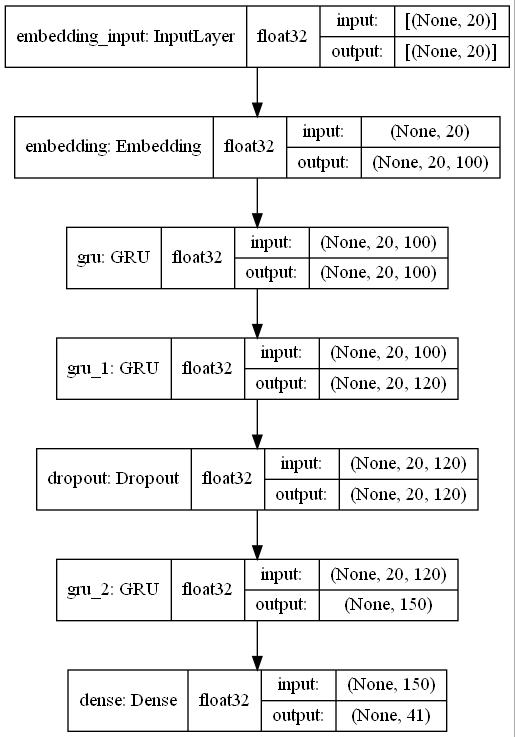

In [40]:
#keras.utils.plot_model(model,show_shapes=True,show_dtype=True,to_file='E:\\capstone\\Capstone Pics\\model.jpg')

In [41]:
#es = EarlyStopping(monitor='val_accuracy')

In [42]:
model.compile(optimizer=keras.optimizers.Nadam(),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [43]:
hist = model.fit(xtrain,ytrain,epochs=10,validation_split=0.2,verbose=1,batch_size=64)

Epoch 1/10
44/44 [==============================] - 28s 357ms/step - loss: 3.4252 - accuracy: 0.1231 - val_loss: 1.9646 - val_accuracy: 0.3498
Epoch 2/10
44/44 [==============================] - 8s 175ms/step - loss: 1.3294 - accuracy: 0.6732 - val_loss: 0.5428 - val_accuracy: 0.8418
Epoch 3/10
44/44 [==============================] - 7s 172ms/step - loss: 0.3338 - accuracy: 0.9457 - val_loss: 0.1398 - val_accuracy: 0.9811
Epoch 4/10
44/44 [==============================] - 5s 103ms/step - loss: 0.1268 - accuracy: 0.9870 - val_loss: 0.0982 - val_accuracy: 0.9898
Epoch 5/10
44/44 [==============================] - 11s 245ms/step - loss: 0.0819 - accuracy: 0.9909 - val_loss: 0.0528 - val_accuracy: 0.9913
Epoch 6/10
44/44 [==============================] - 8s 179ms/step - loss: 0.0510 - accuracy: 0.9947 - val_loss: 0.0463 - val_accuracy: 0.9956
Epoch 7/10
44/44 [==============================] - 12s 287ms/step - loss: 0.0415 - accuracy: 0.9947 - val_loss: 0.0411 - val_accuracy: 0.9927
Epo

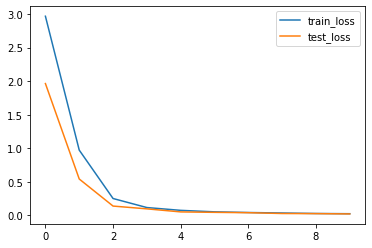

In [44]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train_loss','test_loss'])
plt.show()

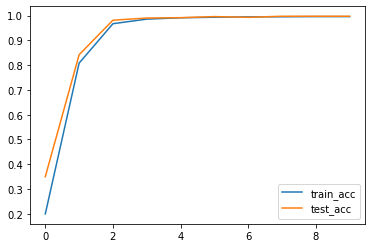

In [45]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train_acc','test_acc'])
plt.show()

In [46]:
pred = model.predict_classes(xtest)

c:\users\gaurav\anaconda3\envs\tensor_gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
print(len(pred))

1476


In [48]:
print(xtest)

[[   0    0    0 ... 1228 4311  942]
 [   0    0    0 ... 3855  884 2800]
 [   0    0    0 ... 1463  123 4204]
 ...
 [   0    0    0 ... 1851 3353 4472]
 [   0    0    0 ... 4507 4311  942]
 [   0    0    0 ...  144  884 2058]]


In [49]:
xtest[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       4225, 1228, 3014, 2409, 1410, 2997, 3855,  884, 2800])

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score

In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        42
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00        42
          17       1.00    

In [52]:
print(balanced_accuracy_score(ytest,pred))

0.9953259114472678


In [53]:
print(confusion_matrix(ytest,pred))

[[32  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 38]]


In [54]:
#model.save('E:\\NLP data\\NLP_MODEL\\model.h5')

In [55]:
#model.save_weights('E:\\NLP data\\NLP_MODEL\\model.weights')

In [56]:
main_name = enc.inverse_transform(pred)

In [57]:
len(main_name)

1476

In [58]:
l1 = list(data_discription['Disease'])

In [59]:
dis={}

In [60]:
for i in range(len(l1)):
    dis[i]=l1[i]

In [61]:
l2 = list(data_discription['Description'])

In [62]:
l2[0]

'An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.'

In [63]:
discription_report={}

In [64]:
for i,j in zip(l1,l2):
    discription_report[i] = j 

In [65]:
def return_predicted_dieseases_discription(text):
    if(text not in discription_report):
        return None
    return discription_report[str(text)]

In [66]:
def print_diesease_discription(main_name):
    for i in main_name:
        print("Diseases : %s\nDiscription : %s " %(i,return_predicted_dieseases_discription(i)), end=" " )
        print("\n")

In [67]:
print_diesease_discription(main_name)

Diseases : Heart attack
Discription : The death of heart muscle due to the loss of blood supply. The loss of blood supply is usually caused by a complete blockage of a coronary artery, one of the arteries that supplies blood to the heart muscle.  

Diseases : hepatitis A
Discription : Hepatitis A is a highly contagious liver infection caused by the hepatitis A virus. The virus is one of several types of hepatitis viruses that cause inflammation and affect your liver's ability to function.  

Diseases : Tuberculosis
Discription : Tuberculosis (TB) is an infectious disease usually caused by Mycobacterium tuberculosis (MTB) bacteria. Tuberculosis generally affects the lungs, but can also affect other parts of the body. Most infections show no symptoms, in which case it is known as latent tuberculosis.  

Diseases : Hypoglycemia
Discription :  Hypoglycemia is a condition in which your blood sugar (glucose) level is lower than normal. Glucose is your body's main energy source. Hypoglycemia 


Diseases : Bronchial Asthma
Discription : Bronchial asthma is a medical condition which causes the airway path of the lungs to swell and narrow. Due to this swelling, the air path produces excess mucus making it hard to breathe, which results in coughing, short breath, and wheezing. The disease is chronic and interferes with daily working.  

Diseases : Pneumonia
Discription : Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. The alveoli fill with fluid or pus, making it difficult to breathe.  

Diseases : Bronchial Asthma
Discription : Bronchial asthma is a medical condition which causes the airway path of the lungs to swell and narrow. Due to this swelling, the air path produces excess mucus making it hard to breathe, which results in coughing, short breath, and wheezing. The disease is chronic and interferes with daily working.  

Diseases : Jaundice
Discr

Discription : None  

Diseases : Chicken pox
Discription : Chickenpox is a highly contagious disease caused by the varicella-zoster virus (VZV). It can cause an itchy, blister-like rash. The rash first appears on the chest, back, and face, and then spreads over the entire body, causing between 250 and 500 itchy blisters.  

Diseases : Hepatitis C
Discription : Inflammation of the liver due to the hepatitis C virus (HCV), which is usually spread via blood transfusion (rare), hemodialysis, and needle sticks. The damage hepatitis C does to the liver can lead to cirrhosis and its complications as well as cancer.  

Diseases : Pneumonia
Discription : Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. The alveoli fill with fluid or pus, making it difficult to breathe.  

Diseases : Osteoarthristis
Discription : Osteoarthritis is the most common form of arthritis, aff

Discription : Impetigo (im-puh-TIE-go) is a common and highly contagious skin infection that mainly affects infants and children. Impetigo usually appears as red sores on the face, especially around a child's nose and mouth, and on hands and feet. The sores burst and develop honey-colored crusts.  

Diseases : Hypertension 
Discription : None  

Diseases : Alcoholic hepatitis
Discription : Alcoholic hepatitis is a diseased, inflammatory condition of the liver caused by heavy alcohol consumption over an extended period of time. It's also aggravated by binge drinking and ongoing alcohol use. If you develop this condition, you must stop drinking alcohol  

Diseases : Heart attack
Discription : The death of heart muscle due to the loss of blood supply. The loss of blood supply is usually caused by a complete blockage of a coronary artery, one of the arteries that supplies blood to the heart muscle.  

Diseases : Impetigo
Discription : Impetigo (im-puh-TIE-go) is a common and highly contagi